# Intoduction

This is a 5 layers Convolutional Neural Network with Batch Normalization, Dropouts and Callbacks for digits recognition. I built the model with well-knonw framework Keras. 

Firstly, I did quick exploratory data analysis, made normalization and prepared data for processing. 

Secondly, I dug into tuning hyperparameters of chosen model to improve accuracy. 

I achieved 99.545% of accuracy on the test set on Kaggle competition with this CNN. Computation was done with Kaggle notebook, because i don't have a GPU and with my CPU computations could be for 3-4 hours.

In [6]:
#Import general libraries

import numpy as np # linear algebra
import pandas as pd # data processing 
import matplotlib.pyplot as plt #plotting
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split

import tensorflow

from keras import models
from keras import layers
from tensorflow.keras.utils import plot_model
from keras_preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

## 1. EDA and Data preprocessing part

### 1.1. Load data

In [8]:
train = pd.read_csv("Digit Recognizer/input/train.csv")
train.shape

(59649, 786)

In [9]:
test = pd.read_csv("Digit Recognizer/input/test.csv")
test.shape

(10351, 785)

In [10]:
train.head()

,Id,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Let's look through the dataset

,Id,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


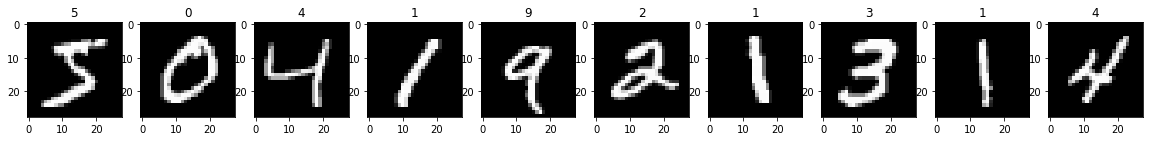

In [11]:
fig, axes = plt.subplots(1, 10, figsize=(20, 20))

# Let's look to first 10 images on dataset
images = train.drop(["label", "Id"], axis=1)[:10]
labels = train["label"][:10]
images = np.array(images, dtype="float32")
for image, ax, label in zip(images, axes, labels):
    # Shape of images is (28 , 28), there is 1 channel, so choose cmap "grey"
    ax.imshow(image.reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title(label)
train.head()

In [12]:
test.head()

,Id,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,53,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 1.2. Data preprocessing

In [7]:
IMG_SIZE = 28

# Clean train and test sets
x_train = train.drop(["Id", "label"], axis=1)
y_train = train["label"]
x_test = test.drop("Id", axis=1)

# Reshape data with shape which will be put into NN
x_train = x_train.values.reshape(x_train.shape[0], IMG_SIZE, IMG_SIZE, 1)
x_test = x_test.values.reshape(x_test.shape[0], IMG_SIZE, IMG_SIZE, 1)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

# Normalize data: value of each pixel may be from 0 to 255, 
# so divide every value on 255 and get data normalized data from 0 to 1
x_train = x_train/255.0
x_test = x_test/255.0

x_train shape:  (59649, 28, 28, 1)
x_test shape:  (10351, 28, 28, 1)


In [14]:
# Clean train and test sets
x_train = train.drop(["Id", "label"], axis=1)
y_train = train["label"]
x_test = test.drop("Id", axis=1)

# Reshape data with shape which will be put into NN
x_train = x_train.values.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.values.reshape(x_test.shape[0], 28, 28, 1)

print("x_train shape: ", x_train.shape)
print("x_test shape: ", x_test.shape)

x_train shape:  (59649, 28, 28, 1)
x_test shape:  (10351, 28, 28, 1)


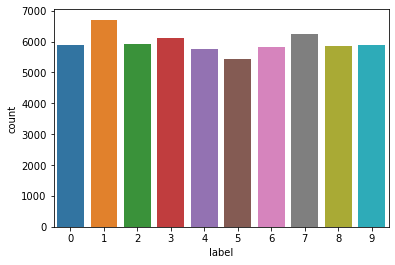

In [8]:
# Let's check distribution of lables to know we don't need a different splitting like cross-validation
sns.countplot(y_train)

In [9]:
# Split train data to train and validation sets with val_size=0.1
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

X_val.shape

(5965, 28, 28, 1)

## 2. CNN

### 2.1. Data augmentation

Important part of this task is data augmentation. I used an ImageDataGenerator to prevent overfitting and improve an accuracy of predictions. 

Accuracy:

Without data augmentation: 0.9909

With data agmentation: 0.99573

In [10]:
datagen = ImageDataGenerator(
    rotation_range=10,          # Angle of rotation
    width_shift_range=0.1,      # Width shift
    height_shift_range=0.1,     # Height shfst
    zoom_range=0.1,             #Zoom
    horizontal_flip=False,
    vertical_flip=False)
datagen.fit(X_train)

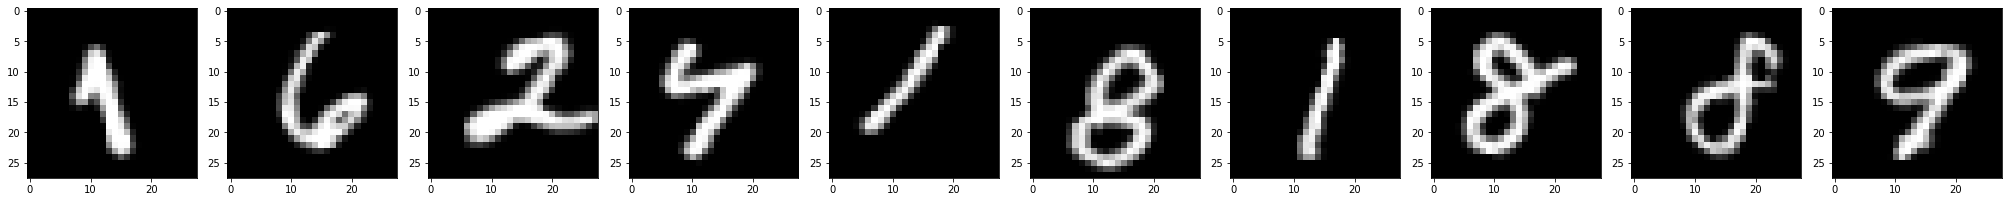

In [11]:
# Let's plot couple of images to show what data augmentation does

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(28,28))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img, cmap=plt.get_cmap("gray"))
    plt.tight_layout()
    plt.show()
    
    
augmented_images = [datagen.flow(X_train, y_train, batch_size=64)[0][0][0].reshape(28,28) for i in range(10)]
plotImages(augmented_images)

### 2.2. Callbacks

Another important aspect to improve an accuracy and automatize process of fitting are callbacks. 

In this task i used 2 kinds of existing callbaks: EarlyStopping and ReduceLROnPlateau

In [12]:
# I used this callback to stop fitting model when validation accuracy doesn't improve for 20 epochs 
# and restored best weights

earlystopping = EarlyStopping(monitor ="val_accuracy",
                              mode = 'auto', patience = 20,
                              restore_best_weights = True)

In [13]:
# I used this callback to reduce learning rate when validation accuracy doesn't improve for 8 epochs
# This method give a huge chance that accuracy will be improved

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=8, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.0001)

### 2.3. CNN

After some expiriments this architecture was chosen:

In [14]:
model = models.Sequential()

model.add(layers.Conv2D(32, (5,5), activation="relu", padding="same", input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (5,5), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3,3), activation="relu", padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D((2,2), strides=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation="softmax"))

#### Set the optimizer, loss and target metrics

In [15]:
# I used an "adam" optimizer which can be looked at 
# as a combination of RMSprop and Stochastic Gradient Descent with momentum.

model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1

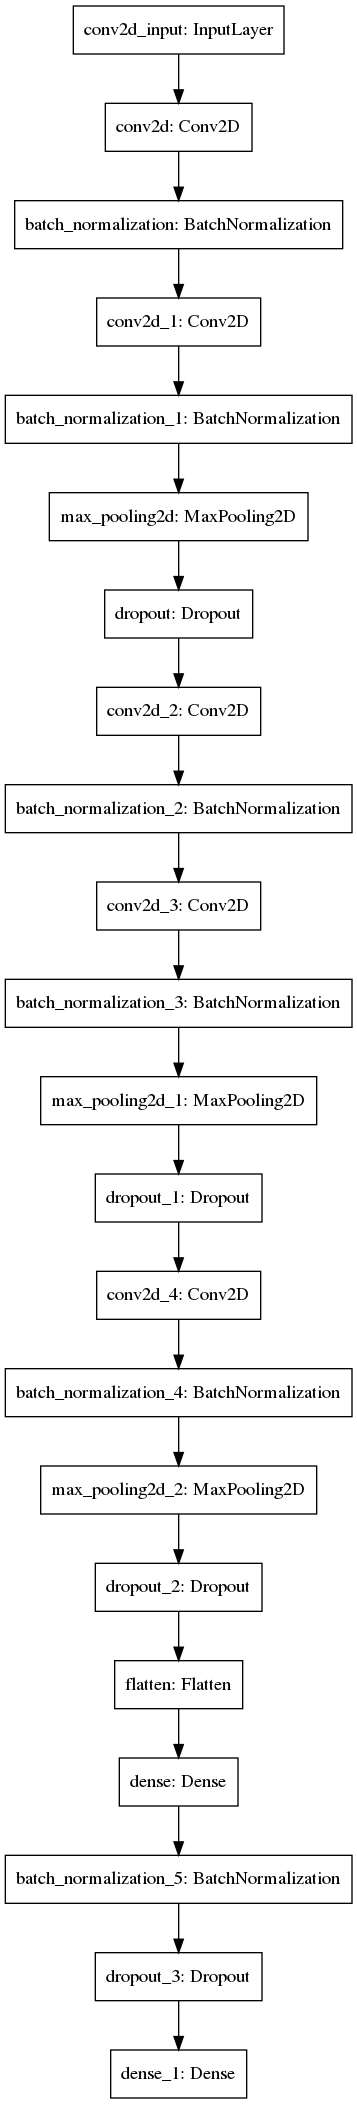

In [17]:
plot_model(model, to_file="model.png")

### 2.4. Fitting and tuning hyperparameters

In [18]:
# I chose these numbers of epochs randomly and batch_size after experiments

EPOCHS = 300 
batch_size = 64

In [19]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    validation_data=(X_val, y_val), 
                    epochs=EPOCHS,
                    callbacks=[earlystopping, learning_rate_reduction])

Epoch 1/300
839/839 [==============================] - 250s 298ms/step - loss: 0.3158 - accuracy: 0.9034 - val_loss: 0.0928 - val_accuracy: 0.9722
Epoch 2/300
839/839 [==============================] - 248s 296ms/step - loss: 0.1036 - accuracy: 0.9680 - val_loss: 0.0345 - val_accuracy: 0.9899
Epoch 3/300
839/839 [==============================] - 249s 297ms/step - loss: 0.0779 - accuracy: 0.9763 - val_loss: 0.0357 - val_accuracy: 0.9886
Epoch 4/300
839/839 [==============================] - 250s 298ms/step - loss: 0.0688 - accuracy: 0.9785 - val_loss: 0.0278 - val_accuracy: 0.9911
Epoch 5/300
839/839 [==============================] - 249s 297ms/step - loss: 0.0614 - accuracy: 0.9804 - val_loss: 0.0339 - val_accuracy: 0.9898
Epoch 6/300
839/839 [==============================] - 251s 299ms/step - loss: 0.0556 - accuracy: 0.9834 - val_loss: 0.0334 - val_accuracy: 0.9898
Epoch 7/300
839/839 [==============================] - 254s 302ms/step - loss: 0.0541 - accuracy: 0.9837 - val_loss: 0

### Let' plot some graphics with loss and accuracy to know about quality of fitting:

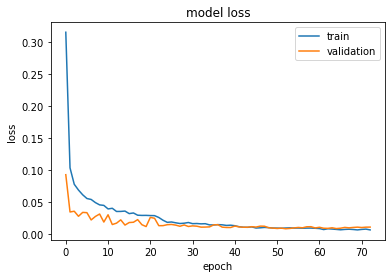

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.savefig("loss.png")
plt.show()

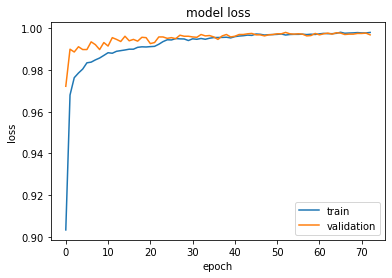

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.savefig("accuracy.png")
plt.show()

## 3. Submission

In [21]:
# Make predictions and chose argmax with max probability

predictions = model.predict(x_test)
sub = np.argmax(predictions, axis=1)
sub

array([3, 7, 2, ..., 1, 3, 0])

In [22]:
# Save predictions to .csv

In [23]:
submissions=pd.DataFrame({"Id": test["Id"],
                         "Label": sub})
submissions.to_csv(f"mnist_lab_cnn_5layers_batchnorm_dropouts_callbacks.csv", index=False, header=True)

### Let's print some results to demonstrate how our model predicts a new data

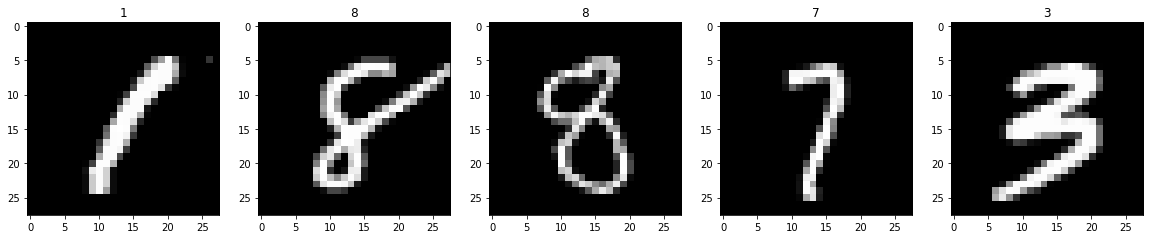

In [50]:
fig, axes = plt.subplots(1, 5, figsize=(20, 20))
images = x_test[100:105]
labels = submissions["Label"][100:105]
images = np.array(images, dtype="float32")
for image, ax, label in zip(images, axes, labels):
    ax.imshow(image.reshape(28,28), cmap=plt.get_cmap('gray'))
    ax.set_title(label)